# Intro to plotting with matplotlib

** Chris Holdgraf** 

Acknowledgements: Clarice Aiello, Boerge Hemmerling, Christopher Klein, Justin Kitzes, Ariel Rokem, Paul Ivanov

## What's the goal of this lecture?

Before we dive in to plotting with python, we should note that the matplotlib library is very complex, and will take you a long time to learn in its entirety (we're still doing this ourselves). 

This lecture is meant to be a taste of the syntax that we generally use when plotting in python (and which we use in python in general). It is also meant to be a brief showing of what matplotlib can do. At the end, we also have some useful links to other plotting libraries that are fancier, but usually more high-level, than matplotlib.

At the end of this lecture, you will be able to plot data in a customized way, using common plot types such as error plots, log plots, and even multidimensional plots and movies. 

## Getting Started

### What is matplotlib?

Matplotlib is the most popular and mature library for plotting data using
Python. It has all of the functionality you would expect, including the ability to control
the formatting of plots and figures at a very fine level.

The official matplotlib documentation is at http://matplotlib.org/  
The matplotlib gallery is at http://matplotlib.org/gallery.html

In [1]:
# Importing the package
# The inline flag means that images will be shown here in the notebooks, rather than in pop-up windows:
# %pylab inline

#%pylab  # This would create floating plots

In [2]:
# However, it is good python practice to make your imports explicit
import matplotlib.pyplot as plt
import numpy as np

# This will cause inline plotting
%matplotlib inline


## Creating Figures

There are two major challenges with creating figures. 

1. Understanding the syntax to actually make the basic plot appear. 
2. Second is formatting the basic plot to look exactly how you would like it to look. In general, the formatting will probably take you longer...

In [3]:
# First, let's create some data that we can use for the plotting...
x = np.linspace(0, 2*np.pi, 360)
y1 = np.sin(x)
y2 = np.sin(x**2)

### Object-oriented vs. function calls
Within pyplot (<font color='red'>currently automatically imported as 'plt'</font>), there are two basic ways to go about making
plots:

* using the Matlab-like clone
* using an object-oriented approach.

The latter provides better control over plot features, while only requiring slightly more typing.

For example, I can create a simple plot using two different methods:

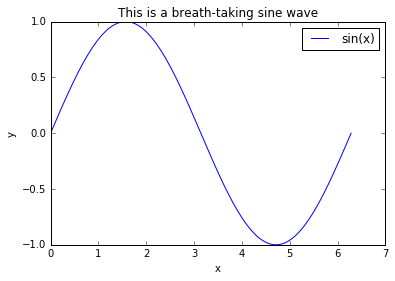

In [4]:
# We can plot this data using a "matlab-style" syntax...
plt.plot(x, y1, label="sin(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title('This is a breath-taking sine wave')

_Note: in order to change the title, I had to call another function called "title".  This assumed that the plot I was referring to was the last one that I created.  But what if I had created multiple plots, and wanted to change an earlier one?_

Using the object-oriented approach allows us to be more specific with our commands...

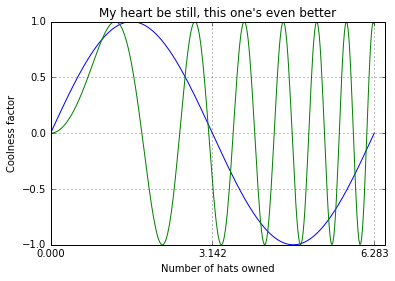

In [5]:
f, ax = plt.subplots()                                    # Manually make a "figure" (f) and "axis" (ax) objects
# We now have access to the "axis" object that we created
# This lets us do lots of other cool things with it
ax.plot(x, y1)
ax.plot(x, y2)

# Labeling
ax.set_title("My heart be still, this one's even better") # COMPARE: in the previous plot, we used plt.title
ax.set_xlabel("Number of hats owned")                     # COMPARE: in the previous plot, we used plt.xlabel
ax.set_ylabel("Coolness factor") 

# Background grid
ax.grid()                                                 # Grid will be set to ticks 
#ax.xaxis.grid()
#ax.yaxis.grid()

# Limits
ax.set_xlim([0,6.5]);                                     # Set x limits
ax.set_xticks([0,np.pi,2*np.pi])                          # Set x ticks

We'll focus on this "object-oriented" plotting method for the rest of the class...

**If you need to get the current active axis:** these commands are useful (``matplotlib`` uses them internally a lot):

    gcf()  # get current figure
    gca()  # get current axis

## A first plot

Let's break down everything that happened above into steps. In simple matplotlib plotting, there are two concepts to distinguish:

- __Figure__ - the entire figure, like what you might see in a journal.  This includes all
subplots, axes, lines, labels, etc. The whole encilada. Another way to think about this is like a _canvas_, upon which you will draw all kinds of different things 
  
- __Subplot/Axes__ - one of the sub-sections of the figure, labeled (a), (b), etc. in
articles. Each subplot will contain one Axes object, which is the container where all of the
useful stuff, such as actual lines, legends, labels, etc., are actually housed.

### Creating a figure

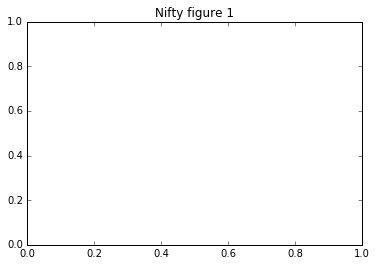

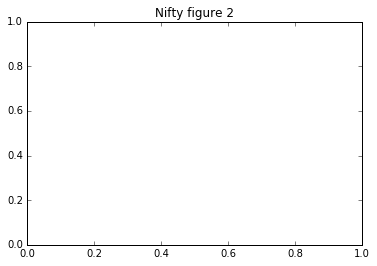

In [6]:
# This function returns one object for the figure
# and one for each axes that you create.
f, ax = plt.subplots()
ax.set_title('Nifty figure 1')

# It is equivalent to:
f = plt.figure()
ax = f.add_subplot(111)   
ax.set_title('Nifty figure 2')

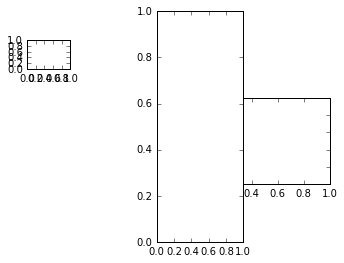

In [7]:
# What happens when we add lots of subplots?
f = plt.figure()
a1 = plt.axes([0, 1, .1, .1])
a2 = plt.axes([.4, .6, .3, .3])
a3 = plt.axes([.3, .4, .2, .8])

Note - This can get a little confusing, so try to just use "subplots" or the various matplotlib subplot helpers instead of directly adding axes (until you really have to).

### Controlling layouts and plotting on a figure
Here's how to make one figure with two subplots, the second of which contains
two lines.  There are many ways to do this, but perhaps the quickest/easiest is to use plt.subplots

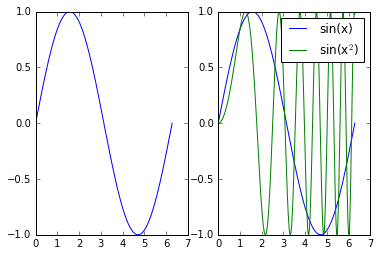

In [8]:
# First, create an empty figure with 2 subplots
# The arguments (1, 2) indicate 1 row and 2 cols
# We are unpacking the two axis objects automatically here
fig, (ax1, ax2) = plt.subplots(1, 2)

# We could also make this vertical if we wanted:
# fig, (ax1, ax2) = plt.subplots(2, 1)

# Next, put one line on the first axis and both lines on the second axis
# On the second axes, add a legend to distinguish the two lines
ax1.plot(x, y1)

# Notice that I can assign the output of "plot" to a variable.
# This is the "line object" referring to the line we just drew.
l1 = ax2.plot(x, y1, label='sin(x)')  # The labels are what appear in the legend
l2 = ax2.plot(x, y2, label='sin(x$^2$)')  # The labels are what appear in the legend
ax2.legend()

# Finally, save the figure as a png file
fig.savefig('myfig.png')

And finally, an arbitrarily complex grid can be made with ``subplot2grid``:

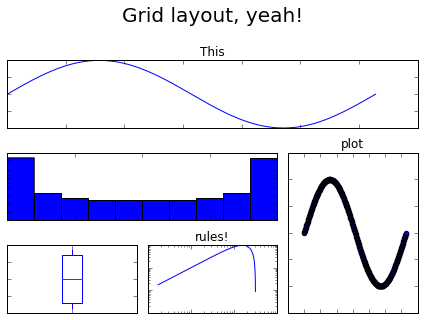

In [10]:
# NOTE: You can even make arbitrarily complicated grids with the subplot2grid tool
f = plt.figure()

# subplot2grid(grid_shape, loc_in_grid, rowspan=1, colspan=1)
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2, 0))
ax5 = plt.subplot2grid((3,3), (2, 1)) 
#ax5 = plt.subplot2grid((3,3), (2, 2))                  # This line will screw up the grid layout. Do you see why?

# Let's turn off visibility of all tick labels here
for ax in f.axes:
    for t in ax.get_xticklabels()+ax.get_yticklabels():
        t.set_visible(False)
        
ax1.plot(x, y1)
ax2.hist(y1)
ax3.scatter(x, y1)
ax4.boxplot(y1)
ax5.loglog(x, y1)

# And add nice titles
ax1.set_title('This')
ax3.set_title('plot')
ax5.set_title('rules!')
f.suptitle('Grid layout, yeah!', fontsize=20, y=1.1)

# --- We can use `tight_layout` to make spacing work well ---
plt.tight_layout()

Ack that's annoying - it looks like some of the text / plots / etc are overlapping with one another. Fortunately, there's a function that (usually) intelligently spaces everything out so it's easier to read. (uncomment the last line above)

In [11]:
# We can even save a figure as an SVG file
f.savefig('./my_great_fig.svg')

### Sharing an axis
As scientists, we often want to make comparisons between datasets or visualizations of data. This means putting plots side by side for comparison. Matplotlib lets us share an axis between plots so that we don't get confused by the scale.

The simplest way to share axes is to use the ``subplots`` function.  More
fine-grained control can be obtained by individually adding ``subplot``s and adding
"share" calls to those, but in most cases the functionality from ``subplots`` is sufficient:

In [12]:
# Simple data to display in various forms
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

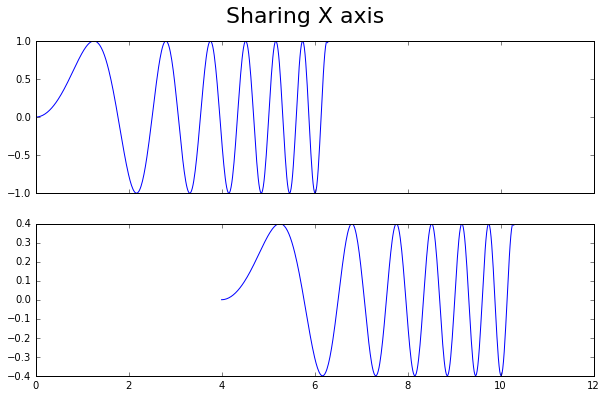

In [13]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True, figsize=(10,6))
f.suptitle("Sharing X axis", fontsize=22)
axarr[0].plot(x, y)
axarr[1].plot(x + 4, y * 0.4)

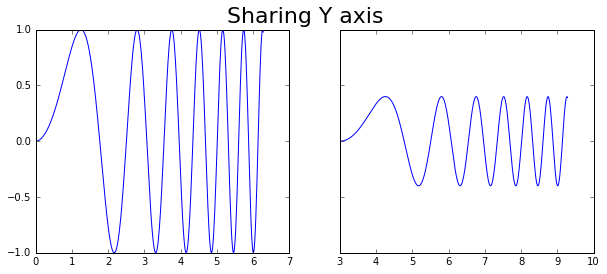

In [14]:
# We can also share the y-axis
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
f.suptitle("Sharing Y axis", fontsize=22)
ax1.plot(x, y)
ax2.plot(x + 3, y * .4)

(-1.25, 1.25)

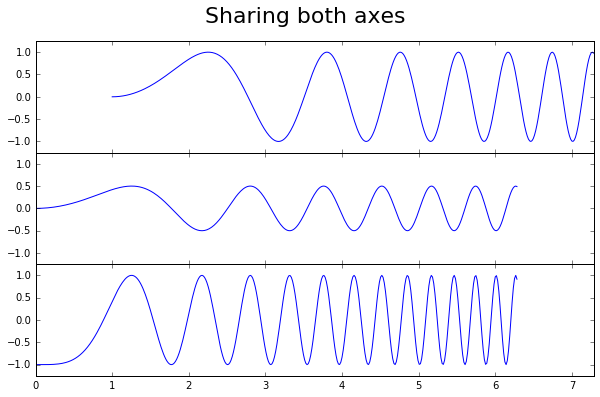

In [15]:
# For the sake of exhaustive completeness, we can also share both
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(10,6))
f.suptitle("Sharing both axes", fontsize=22)

ax1.plot(x+1, y)
ax2.plot(x, y / 2)
ax3.plot(x, 2 * y**2 - 1)

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0) # wspace is for "width-space"
    
# Note that changing the limits of one axis propagates to the others
ax1.set_xlim(0,2 * np.pi+1)   
ax1.set_ylim(-1.25, 1.25)  

## Customizing a plot's appearance

> Everything is an object.  When we created the above plot, we first created a figure object.  This serves as a container for the axis objects, which themselves are containers for the things we draw inside them.  Those things (e.g., lines, tickmarks, and legends) _are themselves_ objects.  This means we should be able to assign them to variables to do all kinds of interesting things.

In ``matplotlib``, most properties for linestyles, colors, etc, can be set directly in
the call:

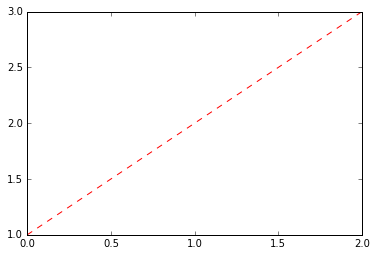

In [16]:
f, ax = plt.subplots()
ax.plot([1,2,3], linestyle='--', color='r') # when omitted, x-values are automatically set to index array (0 .. N-1)

If you know what properties you want to set on a specific object, a
plain ``set`` call is typically the simplest form:

[None, None, None]

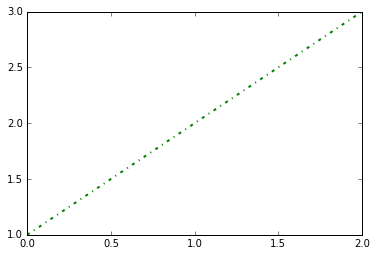

In [17]:
f, ax = plt.subplots()
line, = ax.plot([1,2,3])
line.set(lw=2, c="g", ls="-.")

# Or could do this separately:
# line.set_linewidth(2)
# line.set_color('g')
# line.set_linestyle('-.')

Since axis and figure objects persist in memory, we can even modify these after the fact.

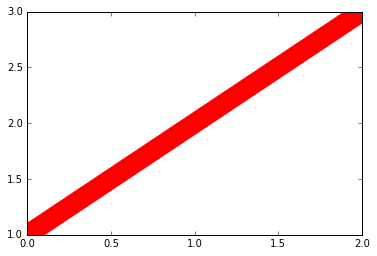

In [18]:
line.set(lw=20, ls='-', color='r')
f

Let's put all together for the following plot.

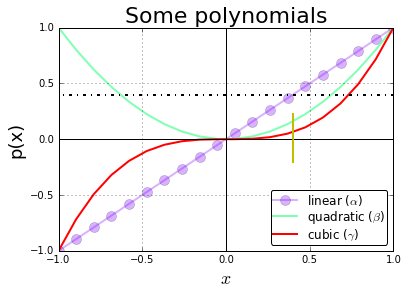

In [19]:
f, ax = plt.subplots()

# Three simple polynomials
x = np.linspace(-1, 1, 20)
y = [x**k for k in [1,2,3]]               # y is a list of 1D arrays

# Plot each with a color following the rainbow (purple -> red), and with different legends
from matplotlib.pyplot import cm                                     
color = iter(cm.rainbow(np.linspace(0, 1, len(y))))
labels = [r'linear ($\alpha$)',
          r'quadratic ($\beta$)',
          r'cubic ($\gamma$)']

for n in range(len(y)):
   c = next(color)
   ax.plot(x, y[n], c=c ,label=labels[n])      # MATLAB users: no need to "hold on" plot

# Change the style of one line: change its marker style & size, give it some transparency
plt.setp(ax.lines[0], marker="o", ms=10, alpha=0.3)

# Make all lines drawn so far thicker
plt.setp(ax.lines, linewidth=2)

# Add a grid and a legend that doesn't overlap the lines
ax.grid(True)
ax.legend(loc="lower right", numpoints=1, 
          fancybox=True, borderpad=0.2, handlelength=2, labelspacing=0.1)

# Add black horizontal and vertical lines through the origin
ax.axhline(0, color="black")
ax.axvline(0, color="black")

# Set main text elements of the plot
ax.set_title("Some polynomials",fontsize=22)
ax.set_xlabel("$x$",fontsize=18)
ax.set_ylabel("p(x)",fontsize=18)

# Add more vertical and horizontal lines
ax.axhline(y=.4, xmin=-1.0, xmax=1.0, linewidth=2, color = 'k', ls='-.') 
ax.axvline(x=0.402, ymin=0.4, ymax = 0.615, linewidth=2, color='y')

You can make all kinds of very professional plots in matplotlib, especially if you use some helper libraries such as pandas or seaborn.

# Common plot types

## Error plots

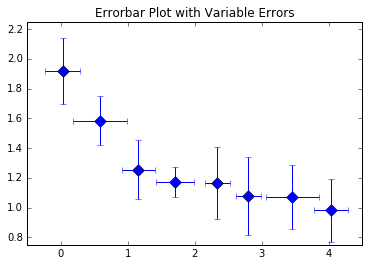

In [20]:
# example data
x = np.linspace(0, 4, 8) + np.random.normal(0.0, 0.05, 8) # Throw in some random jitter
y = np.exp(-x) + np.random.normal(0.0, 0.05, 8) + 1

# example variable error bar values
yerr = abs(np.random.normal(0.3, 0.075, y.size))
xerr = abs(np.random.normal(0.2, 0.05, x.size))

# Not using the object-oriented approach, we can plot:
plt.figure()
plt.errorbar(x, y, xerr, yerr, marker="D", ms=8, ls="")
#plt.errorbar(x, y, xerr, marker="D", ms=8, ls="")         # Is this line plotting the error in x?
#plt.errorbar(x, y, yerr, marker="D", ms=8, ls="")        # Single argument for the error = error in y!
#plt.errorbar(x, y, xerr = xerr, marker="D", ms=8, ls="")
plt.axis([-0.5,4.5,0.75,2.25]) # force plot bounds
plt.title("Errorbar Plot with Variable Errors")

## Logarithmic plots

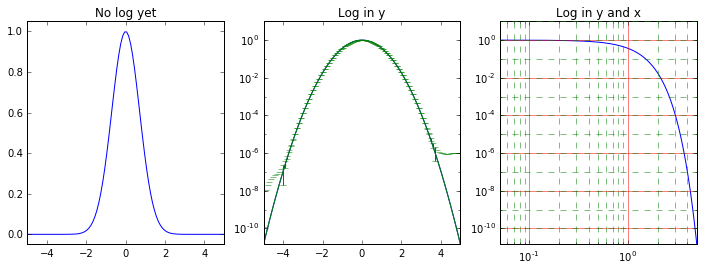

In [21]:
x = np.linspace(-5, 5, 100)
y = np.exp(-x**2)
yerr = np.linspace(1e-10, 1e-6, y.size)              # Add some error to the y values

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(x, y)
ax1.set_title('No log yet')
ax1.set_xlim(-5,5)
ax1.set_ylim(-.05,1.05)

ax2.semilogy(x, y)
ax2.set_title('Log in y')
ax2.set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-0]) # Set ticks manually to reduce crowding
ax2.set_xlim(-5,5)
ax2.set_ylim(0,10)
ax2.errorbar(x, y, yerr=yerr)
#ax2.set_yscale('log')                               # Will the errorbar display correctly with this line commented?

ax3.loglog(x, y)                                     # Note that negative values cannot be plotted
ax3.set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-0])
ax3.set_xlim(-5,5)
ax3.set_ylim(0,10)
ax3.set_title('Log in y and x')
ax3.grid(which='major', linestyle='-', color='r')
ax3.grid(which='minor', color='g', linestyle='--')

## Bar plots

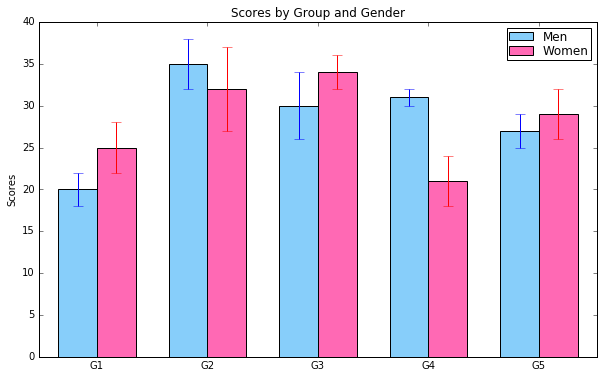

In [22]:
# a bar plot with errorbars
menMeans =   (20, 35, 30, 31, 27)
menStd =     (2, 3, 4, 1, 2)
womenMeans = (25, 32, 34, 21, 29)
womenStd =   (3, 5, 2, 3, 3)

ind = np.arange(len(menMeans))  # the x locations for the groups
width = 0.35                    # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color="LightSkyBlue", yerr=menStd, ecolor="blue", capsize=5)
rects2 = ax.bar(ind+width, womenMeans, width, color="HotPink", yerr=womenStd, ecolor="red", capsize=5)
ax.set_xlim(ind[0]-width/2, ind[-1]+2.5*width) # To make the plot centered nicely

# add some customization
ax.set_ylabel("Scores")
ax.set_title("Scores by Group and Gender")
ax.set_xticks(ind+width)
ax.set_xticklabels( ("G1", "G2", "G3", "G4", "G5") )

ax.legend( (rects1[0], rects2[0]), ("Men", "Women"), borderpad=0.2, handlelength=2, labelspacing=0.1 )

## Scatterplots

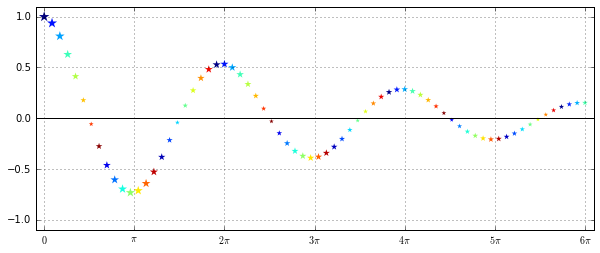

In [23]:
from matplotlib import cm # import the colormappings

t = np.linspace(0.0, 6*np.pi, 70)
y = np.exp(-0.1*t)*np.cos(t)
phase = t % 2*np.pi
f = plt.figure(figsize=(10,4))
ax = f.add_subplot(111)
ax.scatter(t, y, marker="*", s=100*abs(y)+20, c=phase,
           cmap=cm.jet, linewidths=0)
ax.set_ylim(-1.1,1.1)
ax.set_xlim(t[0]-0.3,t[-1]+0.3)
ax.set_xticks(np.pi*np.linspace(0,6,7))
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$",r"$3\pi$",r"$4\pi$",r"$5\pi$",r"$6\pi$"])
ax.grid()           # We cover LaTeX string formatting later, but it's this simple
ax.axhline(0, color="k")

## Histograms

[40, 160, 0, 0.03]

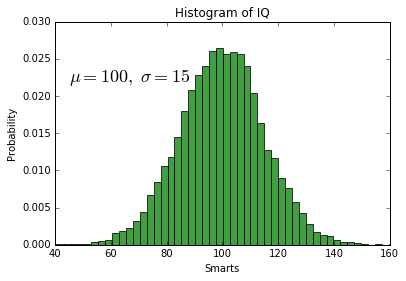

In [24]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, bins=50, normed=1, facecolor="g", alpha=0.75)
# setp(patches[::2], color="r") # Do you remember setp? We can use it here -> X-mas Gaussian
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title("Histogram of IQ")
plt.text(45, .022, r"$\mu=100,\ \sigma=15$", fontsize=18)
plt.axis([40, 160, 0, 0.03])

## Contour plots

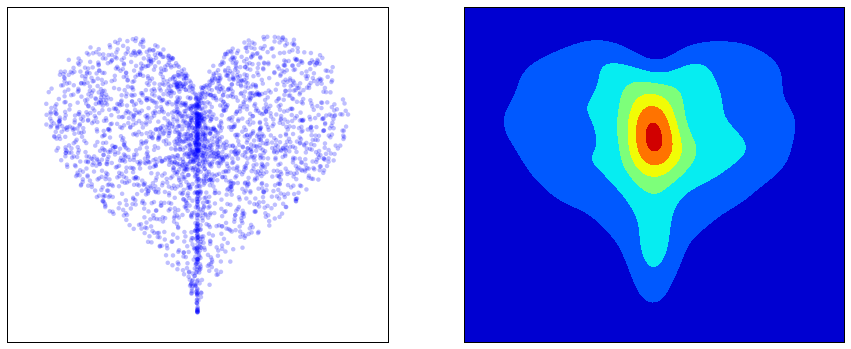

In [25]:
import scipy.stats as stats
from matplotlib import cm

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15,6))

# Create the x and y data points
t = np.hstack((np.random.normal(-np.pi/2, np.pi/6,  1000), 
               np.random.normal( np.pi/2, np.pi/6,  1000),
               np.random.normal( np.pi*0.7, np.pi/2, 300),
               np.random.normal( np.pi*1.3, np.pi/2, 300),
               np.random.normal( np.pi,     np.pi/2, 100)))
n_points = t.size
radial_scaling = np.random.uniform(0.0,1.0, size=n_points)
x_data = (16*(np.sin(t))**3) * radial_scaling
y_data = (13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t)) * radial_scaling**0.5

ax1.scatter(x_data, y_data, edgecolor="none", alpha=0.25)
ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 15)
ax1.set_xticks([])
ax1.set_yticks([])

# To make the contour plot we need 2D arrays of coordinates 
# and values ("heights" or "densities"). Could also just use
# a 2D array (like a grayscale image).
rvs = np.append(np.array([x_data]).T, np.array([y_data]).T, axis=1)
kde = stats.kde.gaussian_kde(rvs.T)
# Regular grid to evaluate kernal density estimator upon
x_flat = np.r_[-20:20:128j]
y_flat = np.r_[-20:15:128j]
x,y = np.meshgrid(x_flat,y_flat)
grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
# create the smoothed "image" of the density
z = kde(grid_coords.T)
z = z.reshape(128,128)
# Create the contour plot, supply x and y to plot with the same axis units
ax2.contourf(x, y, z, 7, cmap=cm.jet)

## Images and arrays of higher dimension

### Plotting data with imshow

Matplotlib also makes it easy to plot images. For this, you can use the plot method imshow
(syntax borrowed from Matlab). Note that this can be useful for looking at data other than images!

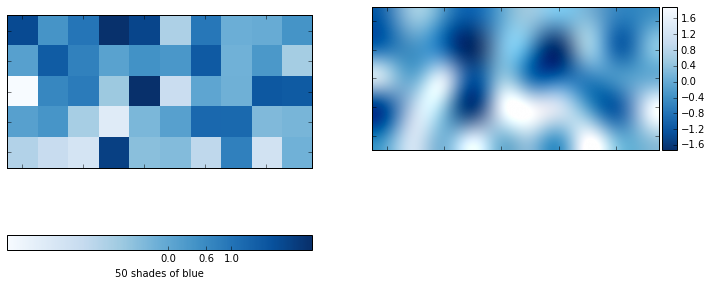

In [26]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 8))

rng = np.random.RandomState(0)
img0 = ax0.imshow(rng.normal(size=(5, 10)), interpolation='nearest', cmap='Blues')
img1 = ax1.imshow(rng.normal(size=(5, 10)), interpolation='lanczos', cmap='Blues_r') # Reverse cmap with _r

# Let's turn off visibility of all tick labels here
for ax in f.axes:
    for t in ax.get_xticklabels()+ax.get_yticklabels():
        t.set_visible(False)

# Plot colorbars
plt.colorbar(img0, ax=ax0,orientation='horizontal', label='50 shades of blue',ticks=[0,0.6,1.0]) #,shrink=0.9, pad = 0.01)

#plt.colorbar(img1, ax=ax1,orientation='vertical')                  # This line will display something ugly
# Alternatively to the line above, create an axis "cax" on the right side of ax1. 
# The width of cax will be 5% of ax1 and the padding between cax and ax1 will be fixed at 0.05 inch.
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img1, cax=cax, orientation='vertical')

### Plotting images with imshow
Matplotlib can easily deal with multidimensional data - for example, an RGB image:

In [27]:
img = plt.imread('trump.png')
img.shape

(72, 72, 4)

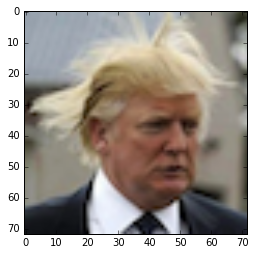

In [28]:
plt.imshow(img)

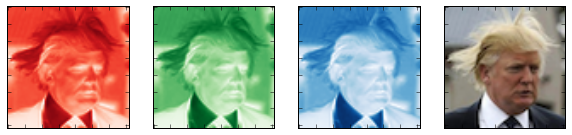

In [29]:
# Plot the different RGB channels
fig, axes = plt.subplots(1, 4, figsize=(10,6))

axes[0].imshow(img[:, :, 0], cmap='Reds')
axes[1].imshow(img[:, :, 1], cmap='Greens') 
axes[2].imshow(img[:, :, 2], cmap='Blues') 
axes[3].imshow(img)

for a in axes:
    a.set_xticklabels([])
    a.set_yticklabels([])
    
# Save as pdf
fig.savefig('TheDonald.pdf')

### 3D plots

In [126]:
# First you've got to import this
from mpl_toolkits.mplot3d import Axes3D

One this has been done, you can create 3d axes with the ``projection="3d"`` keyword to ``add_subplot``:

     fig = plt.figure()

     fig.add_subplot(other-args, projection="3d")

(-1.01, 1.01)

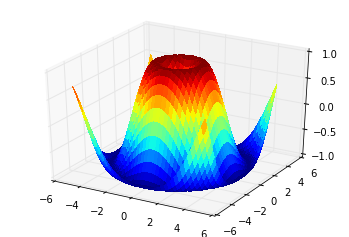

In [127]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

### Movies and animations
Finally, you can also make movies and animations. Different methods are available, the below is one of them.

In [128]:
# Things that need to be imported
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pylab as plt

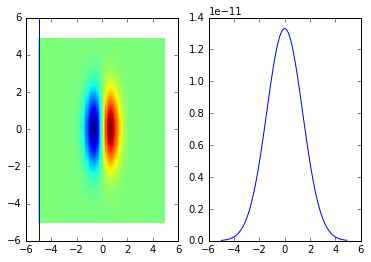

In [129]:
# First set up the figure, the axis, and the plot element we want to animate
# This cell will plot the initial frame
fig = plt.figure()

ax = plt.subplot(1,2,1)
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y)

z = np.exp(-xx**2/1.0 - yy**2/4.0) * np.sin(xx)
img = ax.pcolor(x,y,z)

my_line = ax.axvline(x[0])

ax1 = plt.subplot(1,2,2)

cut_line, = ax1.plot(x, z[:, 0])

In [130]:
# This is the initialization function that plots the background of each frame
def init():
    cut_line.set_data([], [])
    ax1.set_ylim([-1,1])
    return (cut_line,)

# This is the animation function, which is called sequentially
def animate(i):

    x = np.arange(-5, 5, 0.1)
    y = np.arange(-5, 5, 0.1)
    xx, yy = np.meshgrid(x, y)
    z = np.exp(-xx**2/1.0 - yy**2/4.0) * np.sin(xx)
    
    my_line.set_xdata(x[i])
    
    cut_line.set_data(x, z[:, i])    
    return (cut_line,)

# Call the animator. The param blit=True means that only parts that have changed are re-drawn
anim = animation.FuncAnimation(fig, 
                               animate, 
                               init_func=init,
                               frames=len(x), 
                               interval=100, 
                               blit=True)
     
HTML(anim.to_html5_video()) # May get ffmpeg error!
                            # (Linux users, see http://www.faqforge.com/linux/how-to-install-ffmpeg-on-ubuntu-14-04/)

In [33]:
# Configure to save
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# Save video
anim.save('GaussianCutVideo.mp4', writer=writer)

### Interactive plots
It's also possible to create an interactive plot with matplotlib and ipython. In this case, we create a function that both creates a figure, and plots on top of it. We can then use the `interact` function to make this figure interactive for a range of input parameters.

None

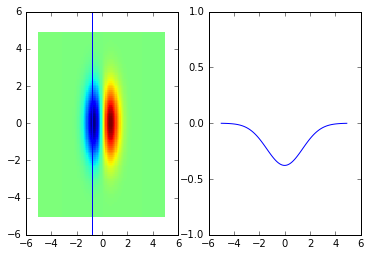

In [131]:
from ipywidgets import interact
    
def plot_interactive(i=0):
    # Create our data
    x = np.arange(-5, 5, 0.1)
    y = np.arange(-5, 5, 0.1)
    xx, yy = np.meshgrid(x, y)
    z = np.exp(-xx**2/1.0 - yy**2/4.0) * np.sin(xx)
    
    # --- Plotting ---
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # Make the image plot
    img = ax1.pcolor(x,y,z)
    my_line = ax1.axvline(x[i])
    cut_line = ax2.plot(x, z[:, i])
    ax2.set_ylim([-1, 1])
 
interact(plot_interactive, i=[0, 100])

# Arbitrary text and LaTeX support

In ``matplotlib``, text can be added either relative to an individual ``axis`` object
or to the whole ``figure``.

These commands add text to the Axes:

- ``ax.set_title()`` - add a title
- ``ax.set_xlabel()`` - add an axis label to the x-axis
- ``ax.set_ylabel()`` - add an axis label to the y-axis
- ``ax.text()`` - add text at an arbitrary location
- ``ax.annotate()`` - add an annotation, with optional arrow

And these act on the whole figure:

- ``plt.figtext()`` - add text at an arbitrary location
- ``fig.suptitle()`` - add a title

And any ``text`` field can contain LaTeX expressions for mathematics, as long as
they are enclosed in ``$`` signs.

Here's how to add text to a plot:

[0, 10, 0, 10]

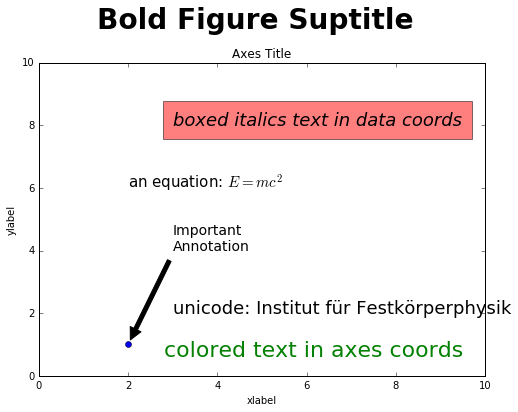

In [132]:
fig = plt.figure(figsize=(8,6))
fig.suptitle("Bold Figure Suptitle", fontsize=28, fontweight="bold")

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title("Axes Title")

ax.set_xlabel("xlabel")
ax.set_ylabel("ylabel")

ax.text(3, 8, "boxed italics text in data coords", style="italic", fontsize=18,
        bbox={"facecolor":"red", "alpha":0.5, "pad":10})

ax.text(2, 6, r"an equation: $E=mc^2$", fontsize=15)

ax.text(3, 2, str(b"unicode: Institut f\374r Festk\366rperphysik","latin-1"), fontsize=18)

ax.text(0.95, 0.05, "colored text in axes coords",
        verticalalignment="bottom", horizontalalignment="right",
        transform=ax.transAxes,
        color="green", fontsize=22)


ax.plot([2], [1], "o")
ax.annotate("Important\nAnnotation", xy=(2, 1), xytext=(3, 4), fontsize=14,
            arrowprops=dict(facecolor="black", shrink=0.05))

ax.axis([0, 10, 0, 10])

### Changing fonts
One can also use different fonts, provided that they are installed on the system. You can also use Latex for fonts, with the code below (commented out)

In [91]:
# import sys
# If latex is installed here, this would work...
# sys.path.append("/usr/bin") # Make the latex path accessible to the notebook

Now we can choose to use these fonts:

In [37]:
# from matplotlib import rc
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# plt.rc('font', serif='Palatino')

Alternatively, we can specify specific fonts when we make a call to plot some text. For example, we'll use the `fontdict` parameter when plotting a title below.

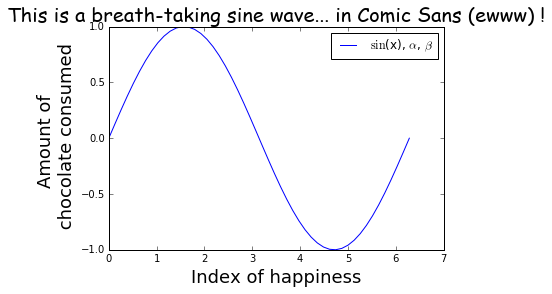

In [133]:
x = np.linspace(0, 2*np.pi)
y1 = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y1, label=r"$\sin$(x), $\alpha$, $\beta$")
ax.legend()
ax.set_xlabel("Index of happiness", fontsize=18)
ax.set_ylabel("Amount of \n chocolate consumed", fontsize=18)
ax.set_title('This is a breath-taking sine wave... in Comic Sans (ewww) !',
             fontdict={'family': 'Comic Sans MS'}, fontsize=20)

# Basic event handling (for after-class fun)

``matplotlib`` has a built-in, toolkit-independent event model that is fairly rich.
If you want to develop full-fledged applications with very complex and fast
interactions, you are likely better off choosing a specific Graphical User
Interface (GUI) toolkit and using its specific event model.  But for many
scientific uses, what ``matplotlib`` offers is more than sufficient, and it has the
advantage of working identically regardless of the GUI toolkit you choose to
run ``matplotlib`` under.

Here we will cover the bare essentials only, for full details you should
consult the `event handling section`_ of the matplotlib user guide.

.. _event handling section: http://matplotlib.sourceforge.net/users/event_handling.html

The basic idea of *all* event handling is always the same: the windowing
environment registers an event (mouse movement, click, keyboard press, etc)
produced by the user.  In advance, you have registered *event handlers*:
functions you define that are meant to be called when specific types of events
occur.  The registration action is called *connecting* the event handler, and
is performed by the ``mpl_connect`` method of the ``figure`` ``canvas`` attribute (the
``canvas`` is the drawing area of the ``figure`` object, the entire raw object where
events take place).

The windowing system will then pass the event (each event has some relevant
information that goes with it, such as which key or button was pressed) to your
function, which can act on it.  These functions are referred to as *callbacks*,
because they are meant to be "called back" not by you, but by the windowing
toolkit when the right event goes by.

Here is the simplest possible ``matplotlib`` event handler:

In [43]:
%matplotlib qt
# switch to default backend to plot in interactive windows

ImportError: Matplotlib qt-based backends require an external PyQt4, PyQt5,
or PySide package to be installed, but it was not found.

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
        event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

The ``FigureCanvas`` method ``mpl_connect`` returns a connection id which
is simply an integer.  When you want to disconnect the callback, just call: ``fig.canvas.mpl_disconnect(cid)``

The most commonly used event types are ``KeyEvent`` and ``MouseEvent``, both of
which have the following attributes:

- ``x`` :- x position - pixels from left of canvas

- ``y`` :- y position - pixels from bottom of canvas

- ``inaxes`` :- the ``matplotlib.axes.Axes`` instance if mouse is over axes

- ``xdata`` :- x coord of mouse in data coords

- ``ydata`` :- y coord of mouse in data coords

In addition, ``MouseEvent``s have:

- ``button`` :- button pressed None, 1, 2, 3, "up", "down" (up and down are used for scroll events)

- ``key`` :- the key pressed: None, any character, "shift", "win", or "control"

# The matplotlib gallery

It can be very intimidating to try to craft exactly the figure that you want, especially if
you are used to being able to adjust things visually using a program like Excel.

If you get stuck and don't know where to start, or just want to learn more about what
matplotlib can do, a great option is to have a look at the matplotlib gallery, which can be
found at http://matplotlib.org/gallery.html. A good way to get started is to find a figure
here that sort of looks like what you want, copy the code, and modify it for your own needs.

# Afterword (and extra links)

Note that this is only the tip of the iceberg for plotting in python.  We've focused on matplotlib, which is the most common/well-developed plotting platform.  However, many others exist that you might be interested in.  Pandas has a lot of useful plotting features, and separate plotting packages are available for more specific data visualization problems (e.g., plotting on a map).

#### Other packages worth looking into:

- [Seaborn](http://www.stanford.edu/~mwaskom/software/seaborn/)
- [pandas](http://pandas.pydata.org/) (plotting libraries within)
- [plotly](https://plot.ly/python/)
- [Bokeh](http://bokeh.pydata.org/en/latest/)
